In [7]:
# importing libraries
import pandas as pd
df = pd.read_csv("/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.head())
df.info()
df.describe()

   Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \


Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024335                 1.093082    20.329428   
min              1.0        1.000000                 1.000000    30.000000   
25%              1.0      491.250000                 2.000000    48.000000   
50%              1.0     1020.500000                 3.000000    66.000000   
75%              1.0     1555.750000                 4.000000    83.750000   
max              1.0     2068.000000                 4.000000   100.000000   

       JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
count     1470.000000  ...               1470.000000         1470.0   
mean         2.729932  ...                  2.712245           80.0   
std          0.711561  ...                  1.081209            0.0   
min          1.000000  ...                  1.000000           80.0   
25%          2.000000  ...                  2.000000           80.0   
50%          3.000000  ...                  3.000000           80.0   
75%          3.000000  ...                  4.000000           80.0   
max          4.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 28 columns]

Accuracy: 73.03%
Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



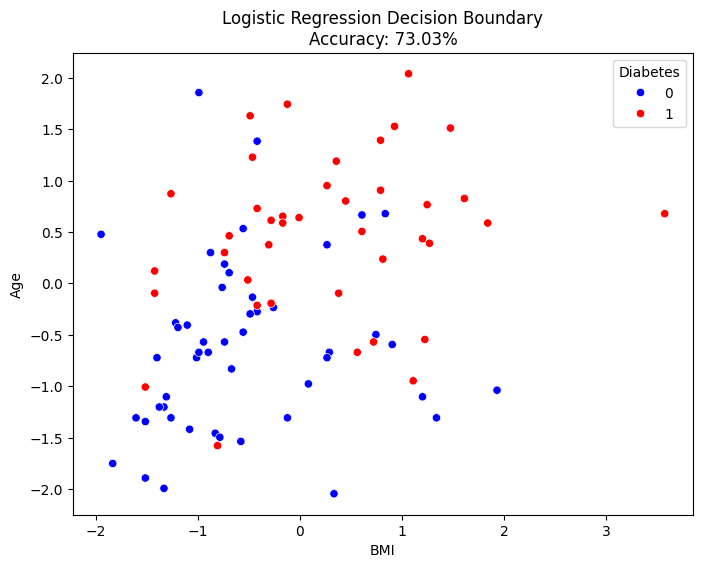

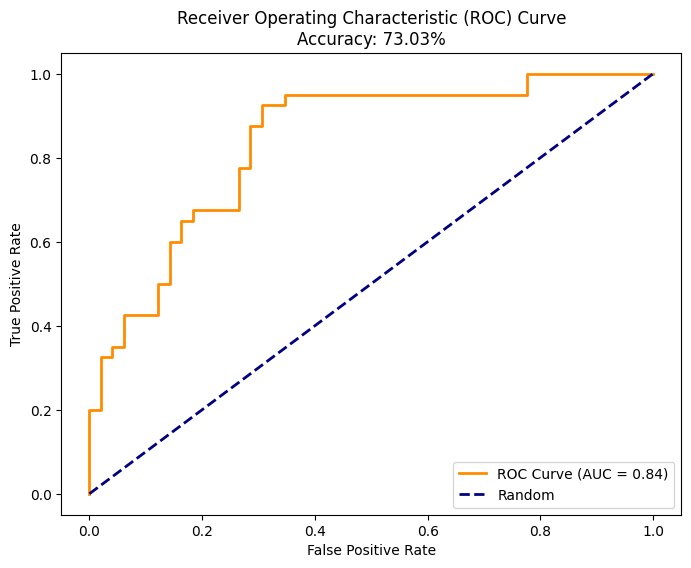

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y_binary, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
				0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	accuracy * 100))
plt.legend(loc="lower right")
plt.show()


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7831a0540820> (for post_execute):


KeyboardInterrupt: 

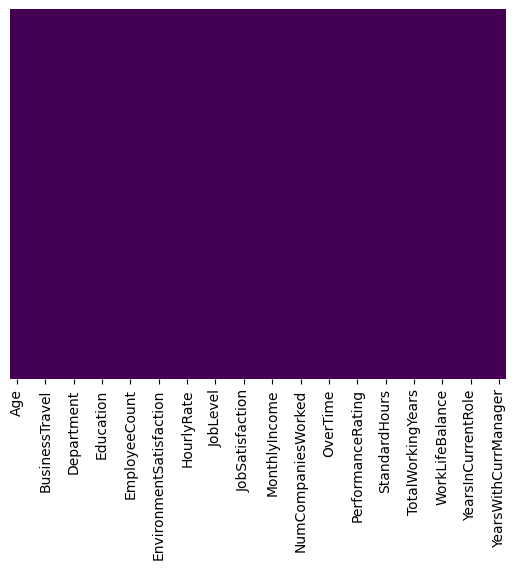

Error in callback <function flush_figures at 0x7831a052fa30> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head())
df.info()
df.describe()
# replacing values
df['Attrition'].replace(['No', 'Yes '],
						[0, 1], inplace=True)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
#just to make sure
df[df.isnull()].count()
g = sns.PairGrid(df,hue='Attrition')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()
# replacing values
df['Attrition'].replace(['No', 'Yes '],
						[0, 1], inplace=True)


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7831a0540820> (for post_execute):


KeyboardInterrupt: 

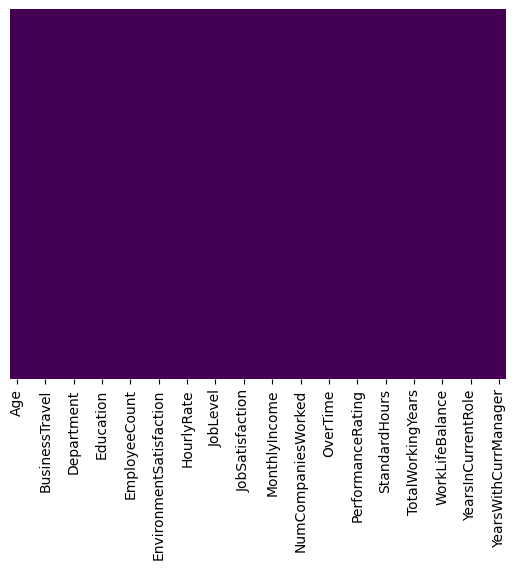

Error in callback <function flush_figures at 0x7831a052fa30> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head())
df.info()
df.describe()
# replacing values
df['Attrition'].replace(['No', 'Yes '],
						[0, 1], inplace=True)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
#just to make sure
df[df.isnull()].count()
g = sns.PairGrid(df,hue='Attrition')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()
# replacing values
df['Attrition'].replace(['No', 'Yes '],
						[0, 1], inplace=True)


   Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \


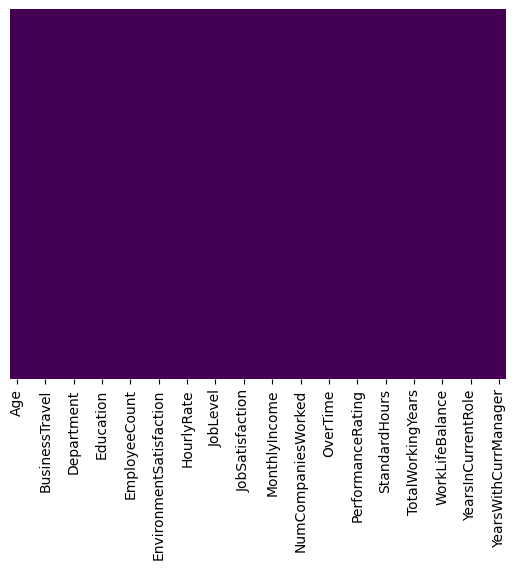

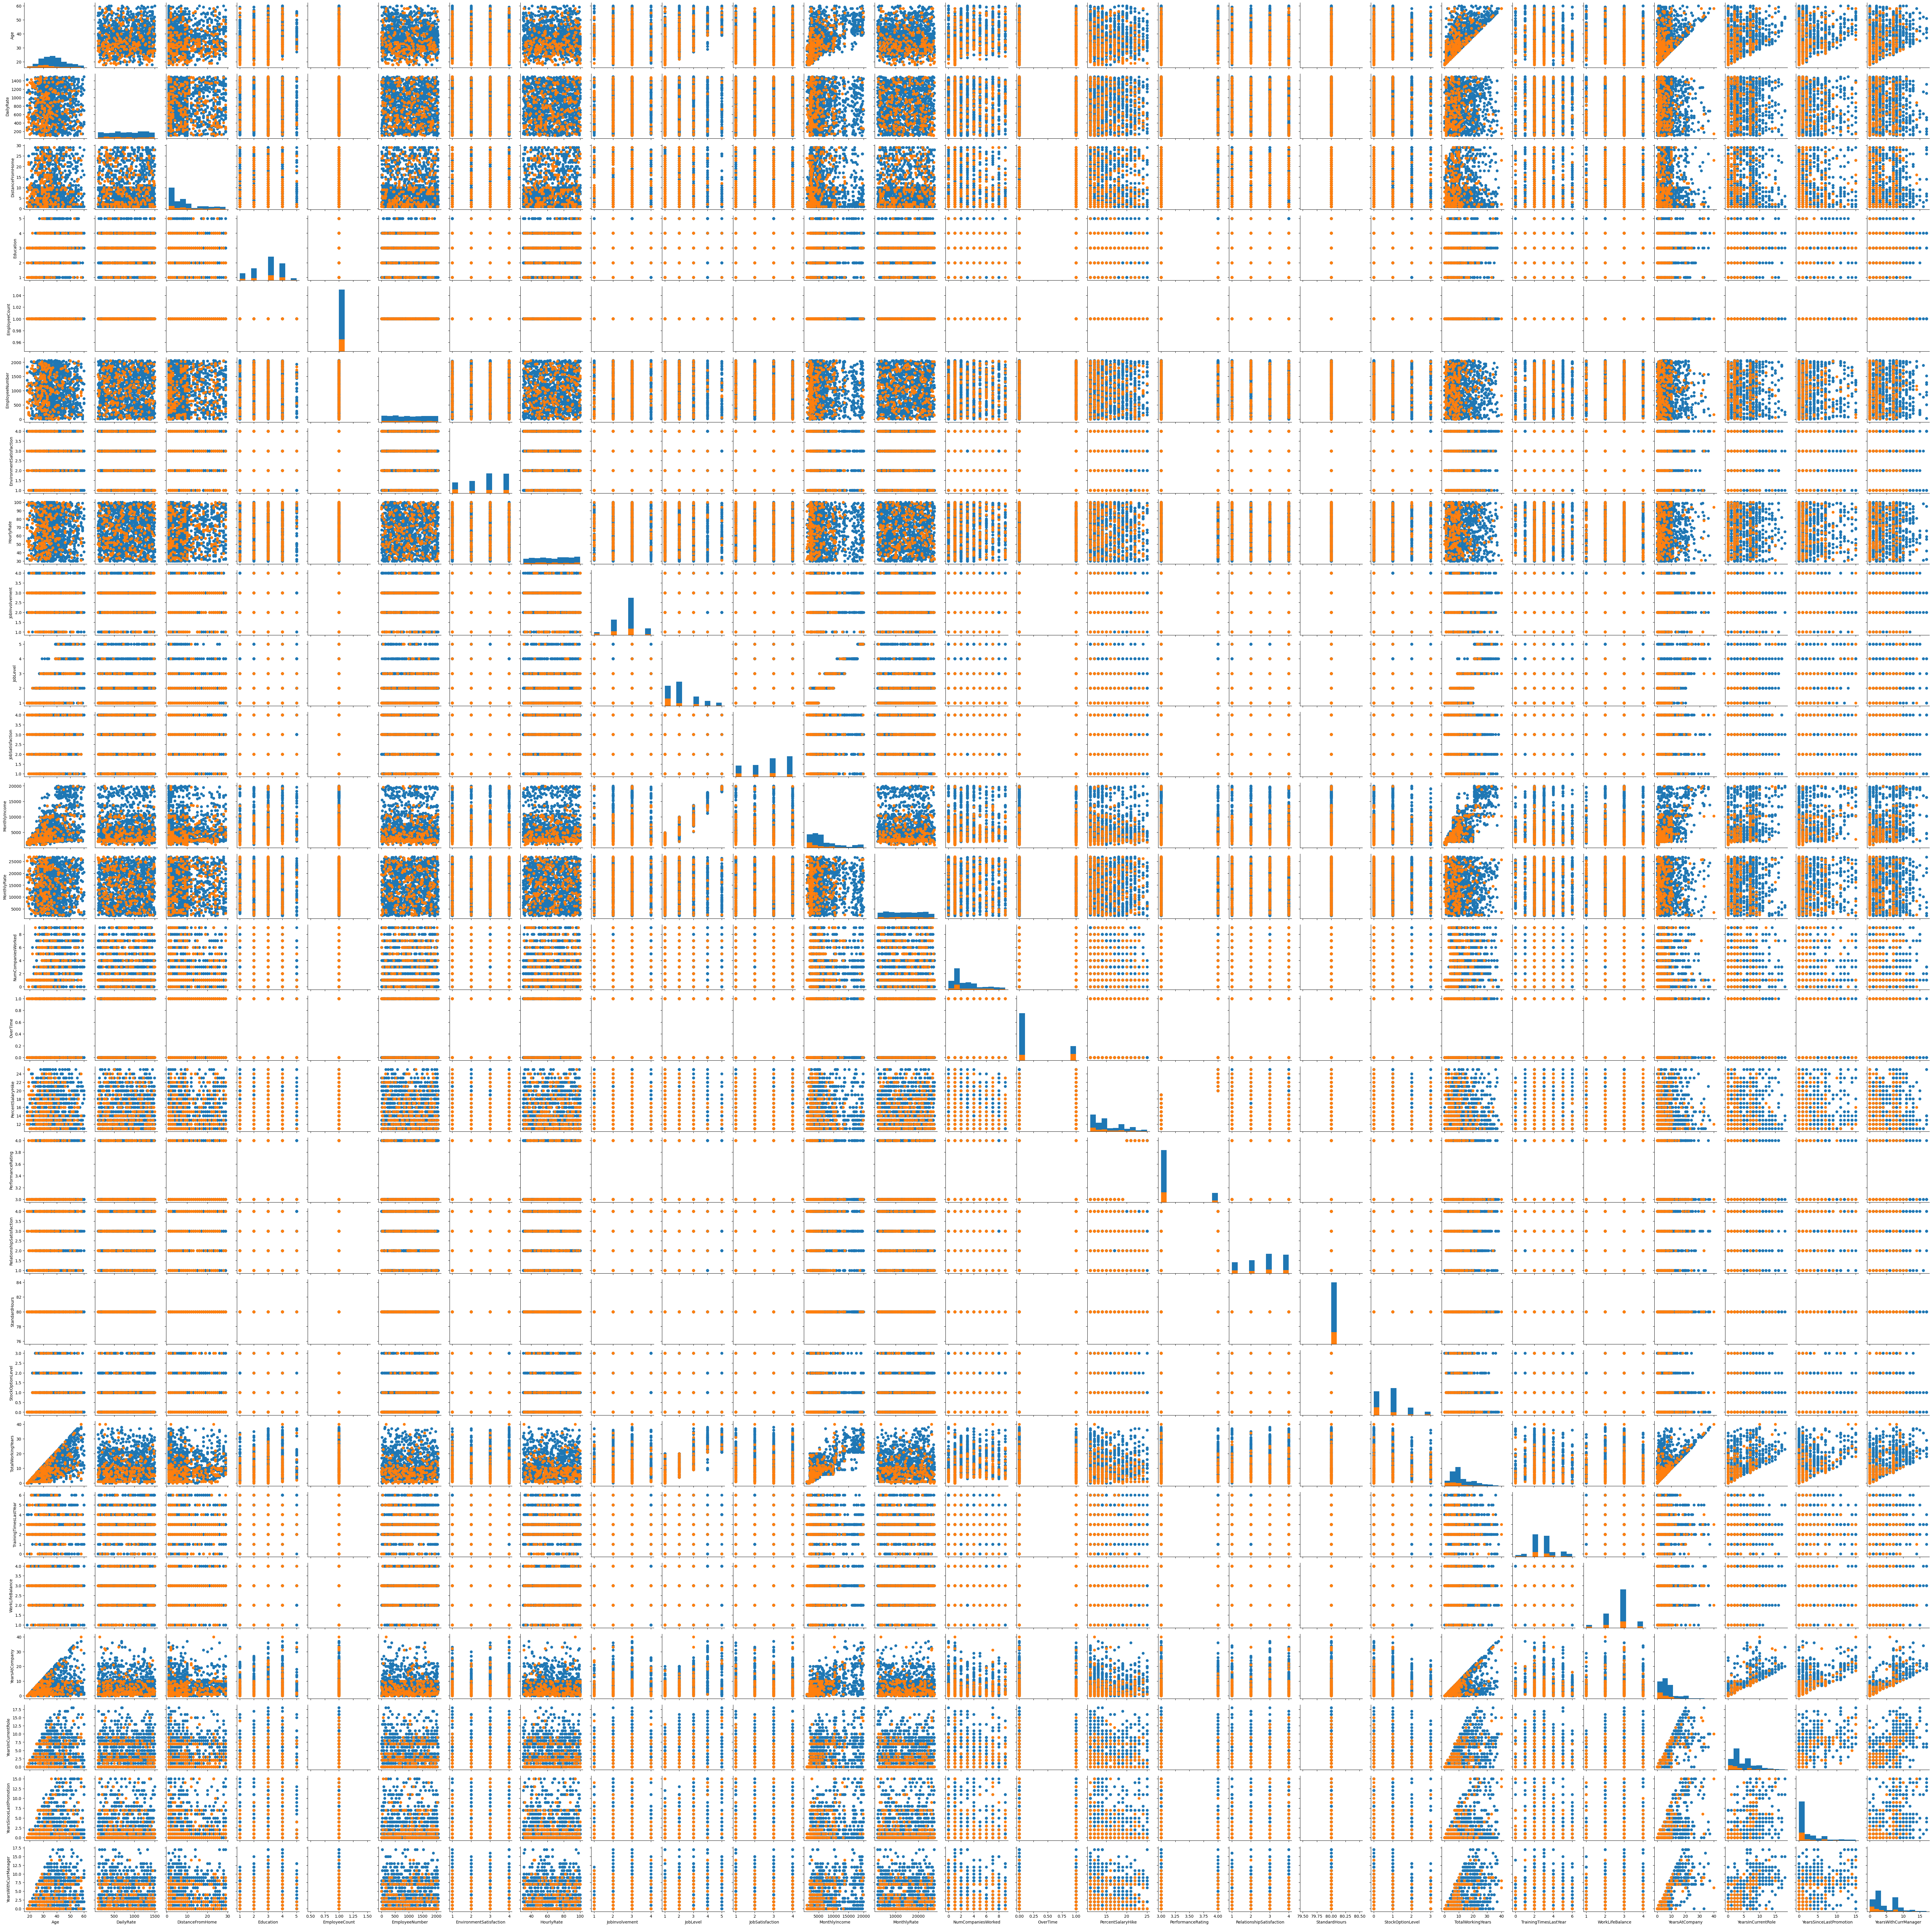

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(df.head())
df.info()
df.describe()
# replacing values
df['Attrition'].replace(['No', 'Yes '],[0, 1], inplace=True)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
#just to make sure
df[df.isnull()].count()
g = sns.PairGrid(df,hue='Attrition')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)


<Axes: >

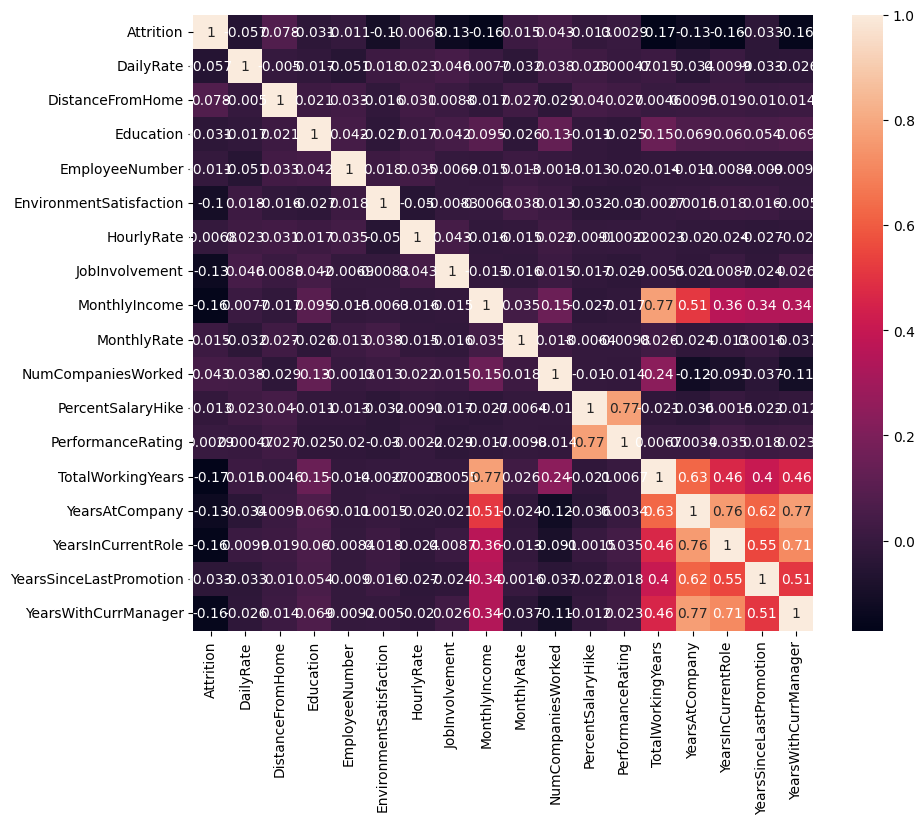

In [ ]:

plt.figure(figsize=(10,8))
corr = df[['Attrition', 'DailyRate', 'DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']].corr()
sns.heatmap(corr,annot=True)


<ipython-input-51-d1f5cfd3e31f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DailyRate'],bins=20)


<Axes: xlabel='DailyRate', ylabel='Density'>

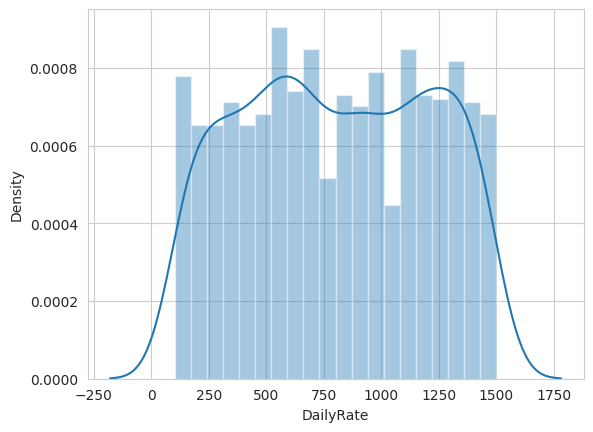

In [ ]:
sns.set_style('whitegrid')
sns.distplot(df['DailyRate'],bins=20)

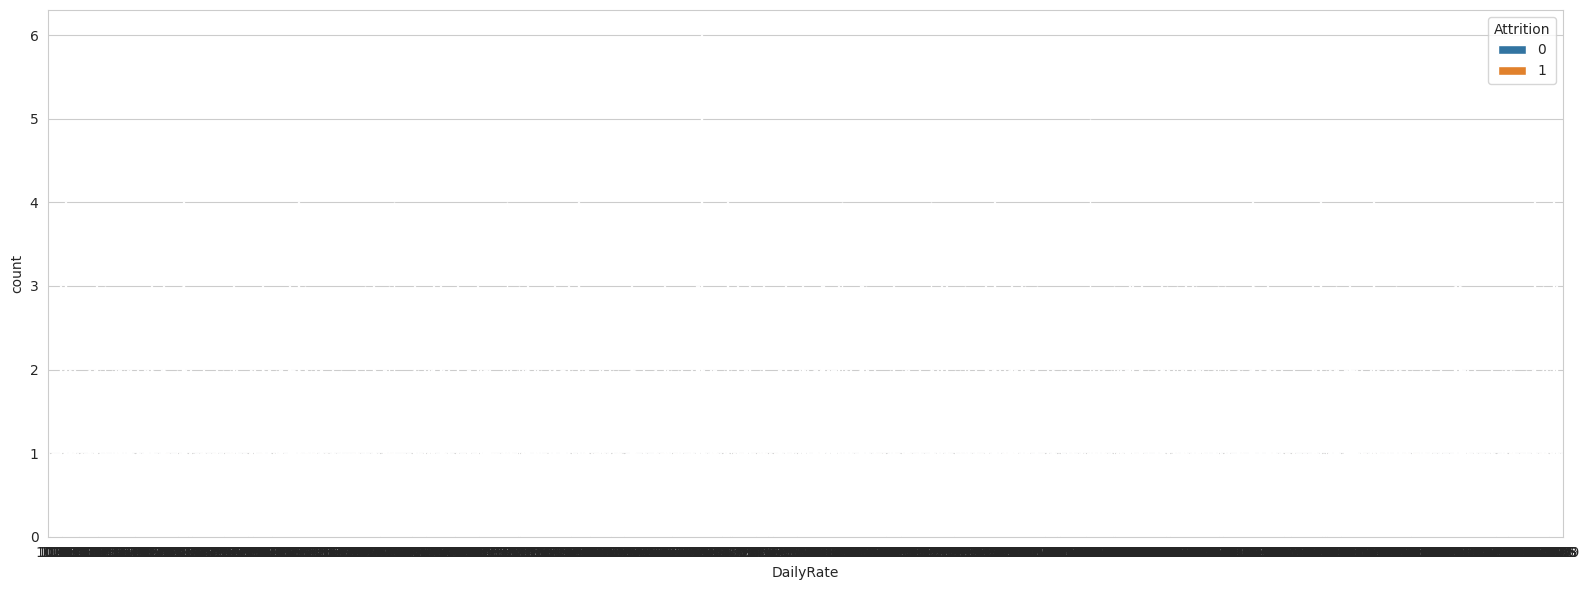

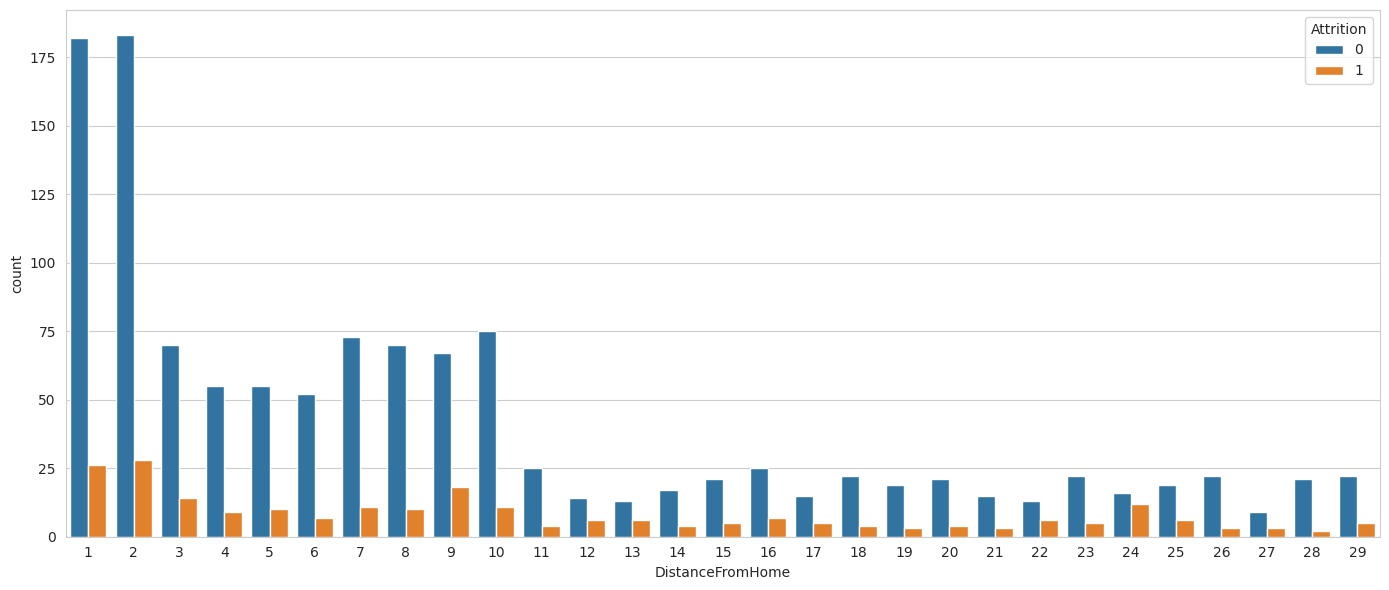

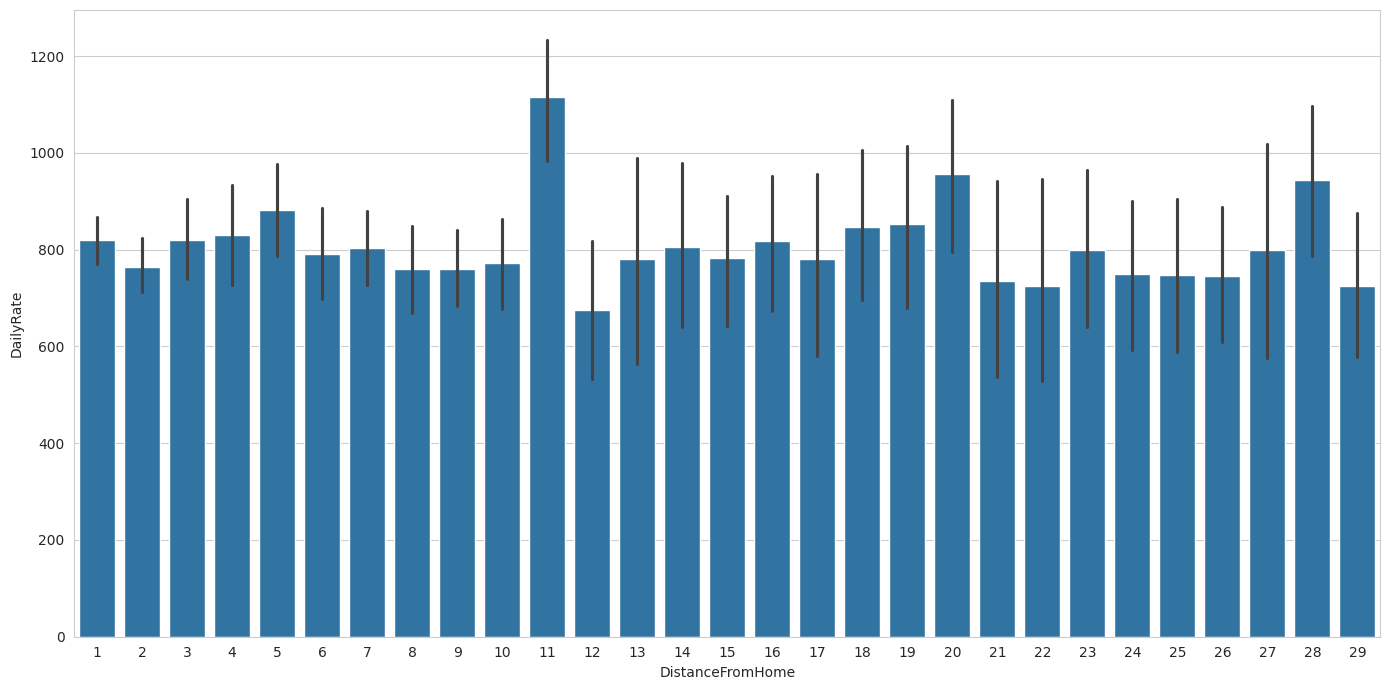

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x=df['DailyRate'],hue=df['Attrition'])
plt.tight_layout()
plt.figure(figsize=(14,6))
sns.countplot(x=df['DistanceFromHome'],hue=df['Attrition'])
plt.tight_layout()
plt.figure(figsize=(14,7))
g = sns.barplot(x=df['DistanceFromHome'],y=df['DailyRate'])
plt.tight_layout()

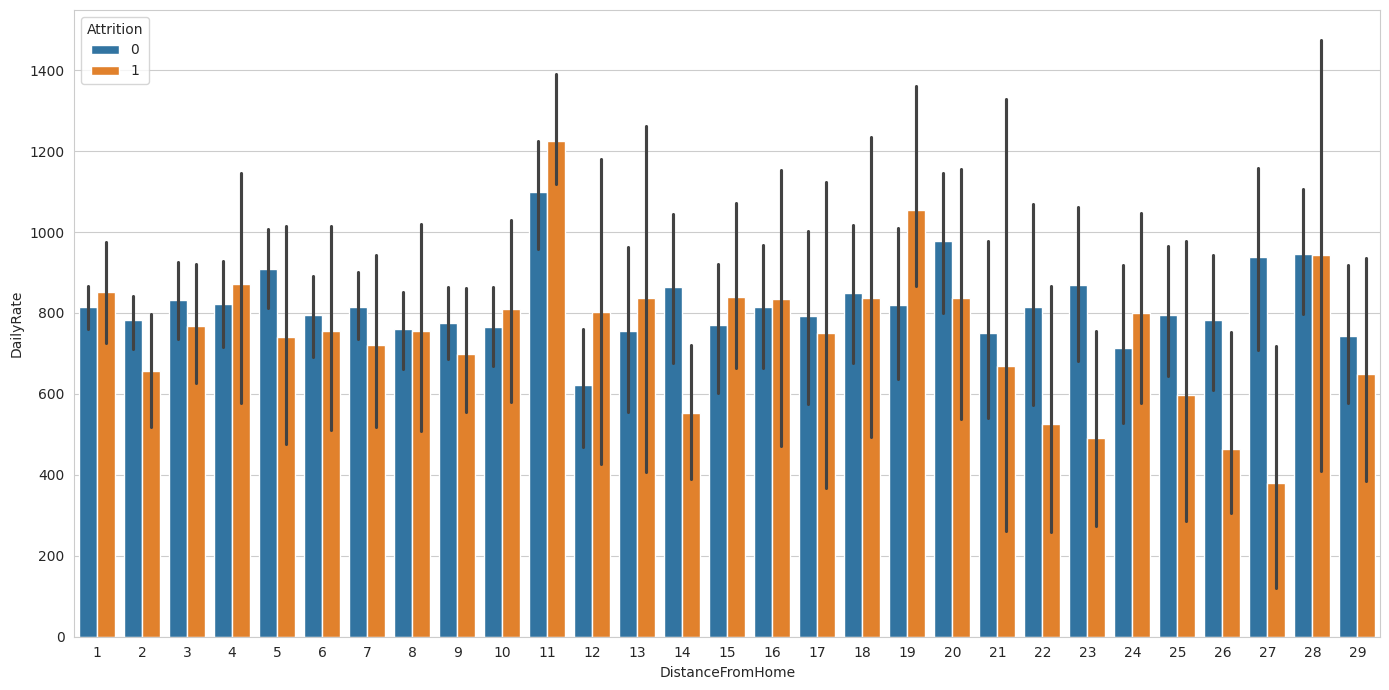

In [ ]:
plt.figure(figsize=(14,7))
g = sns.barplot(x=df['DistanceFromHome'],y=df['DailyRate'],hue=df['Attrition'])
plt.tight_layout()

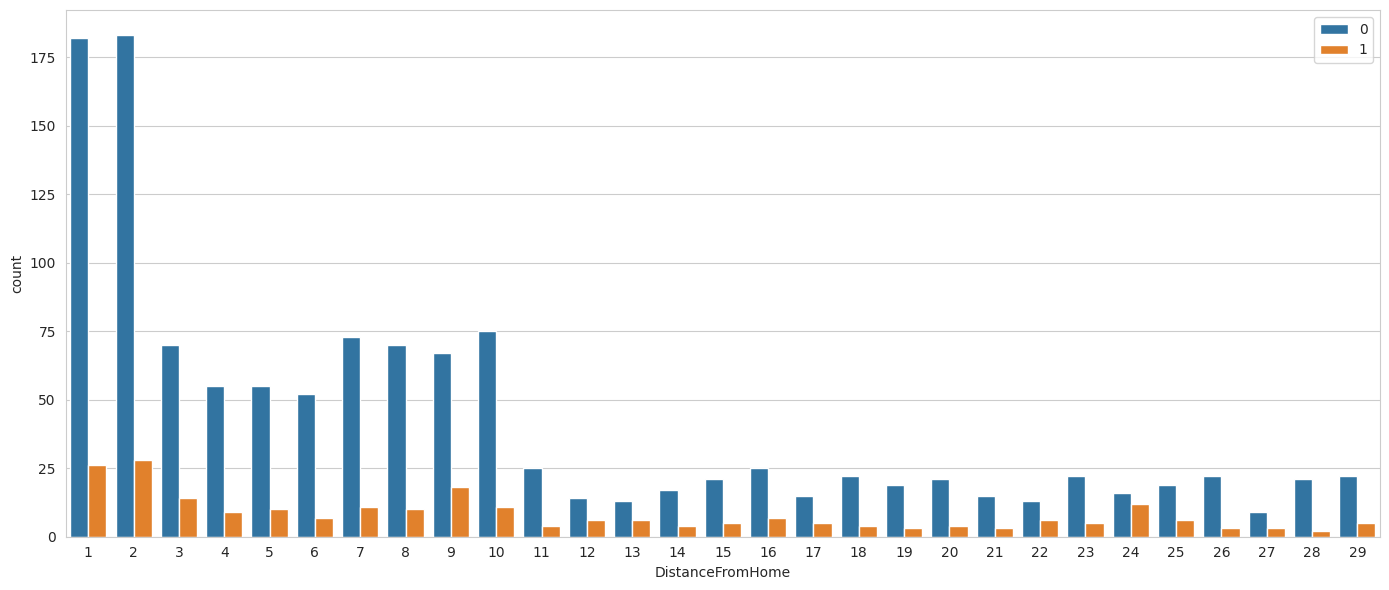

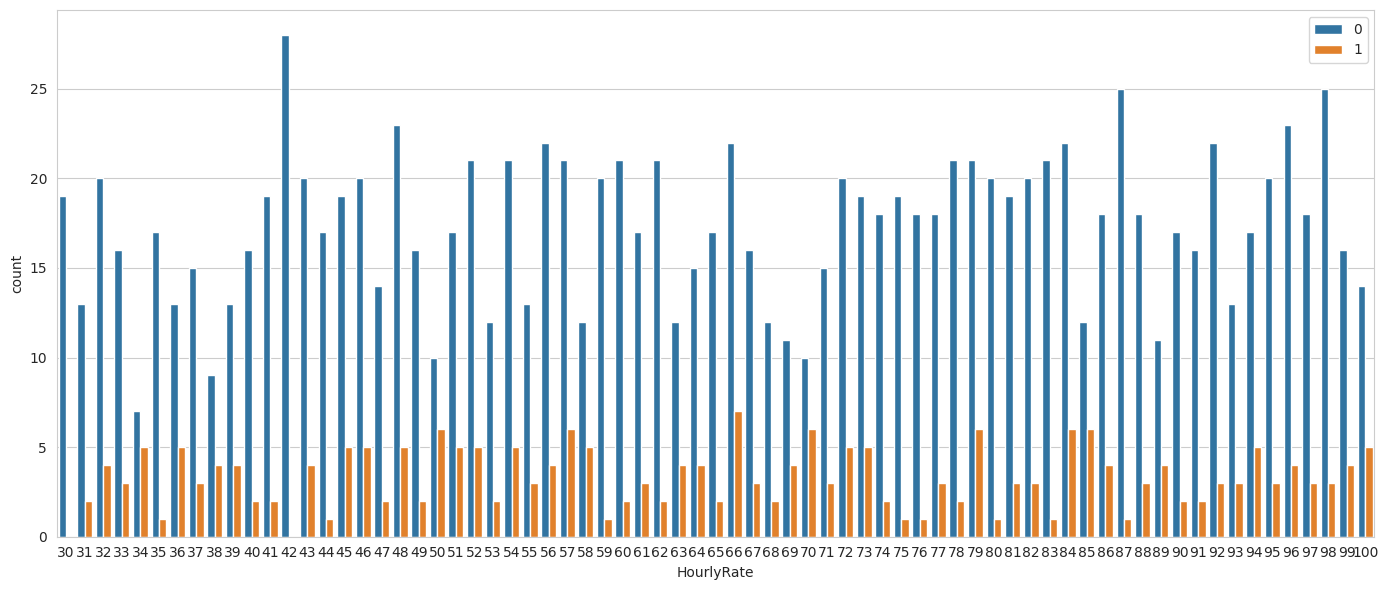

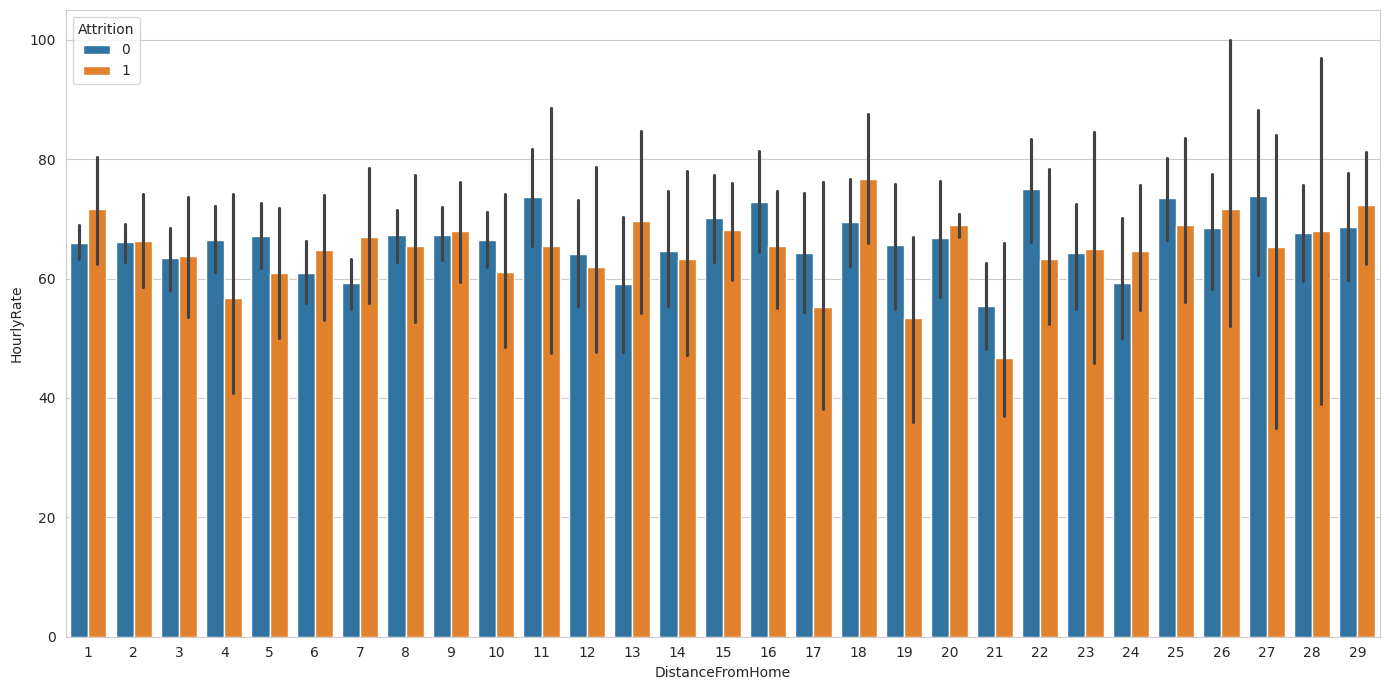

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x=df['DistanceFromHome'],hue=df['Attrition'])
plt.tight_layout()
plt.legend(loc=1)
plt.figure(figsize=(14,6))
sns.countplot(x=df['HourlyRate'],hue=df['Attrition'])
plt.tight_layout()
plt.legend(loc=1)
plt.figure(figsize=(14,7))
g = sns.barplot(x=df['DistanceFromHome'],y=df['HourlyRate'],hue=df['Attrition'])
plt.tight_layout()

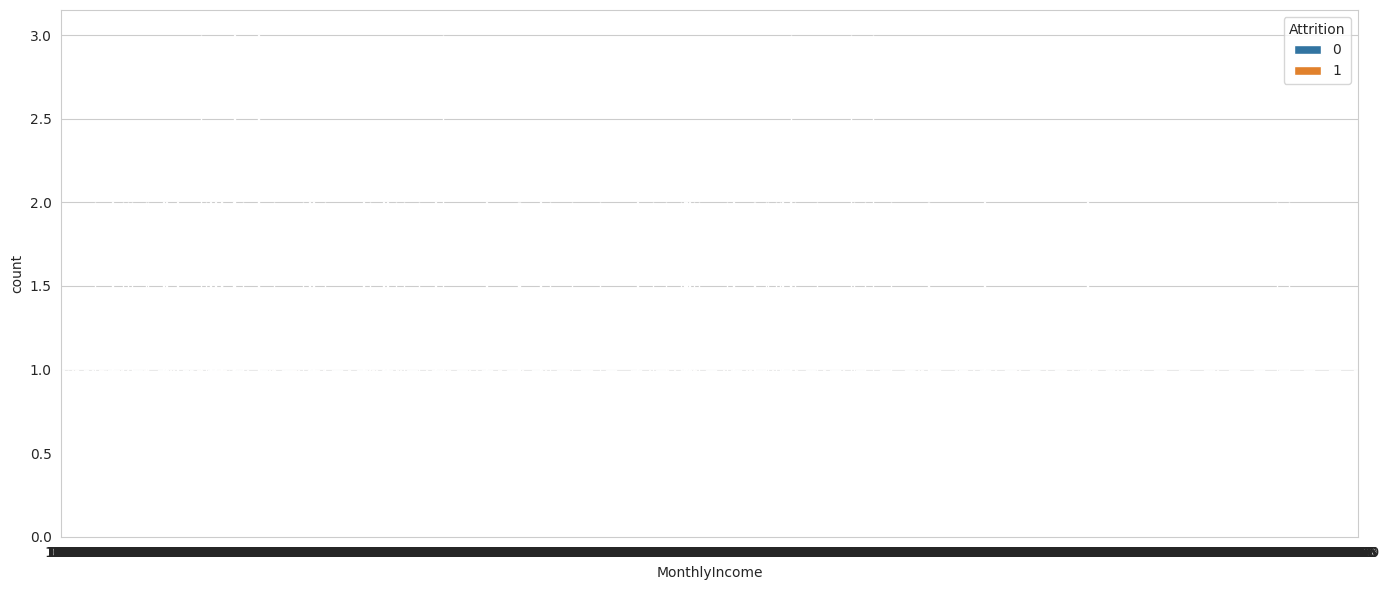

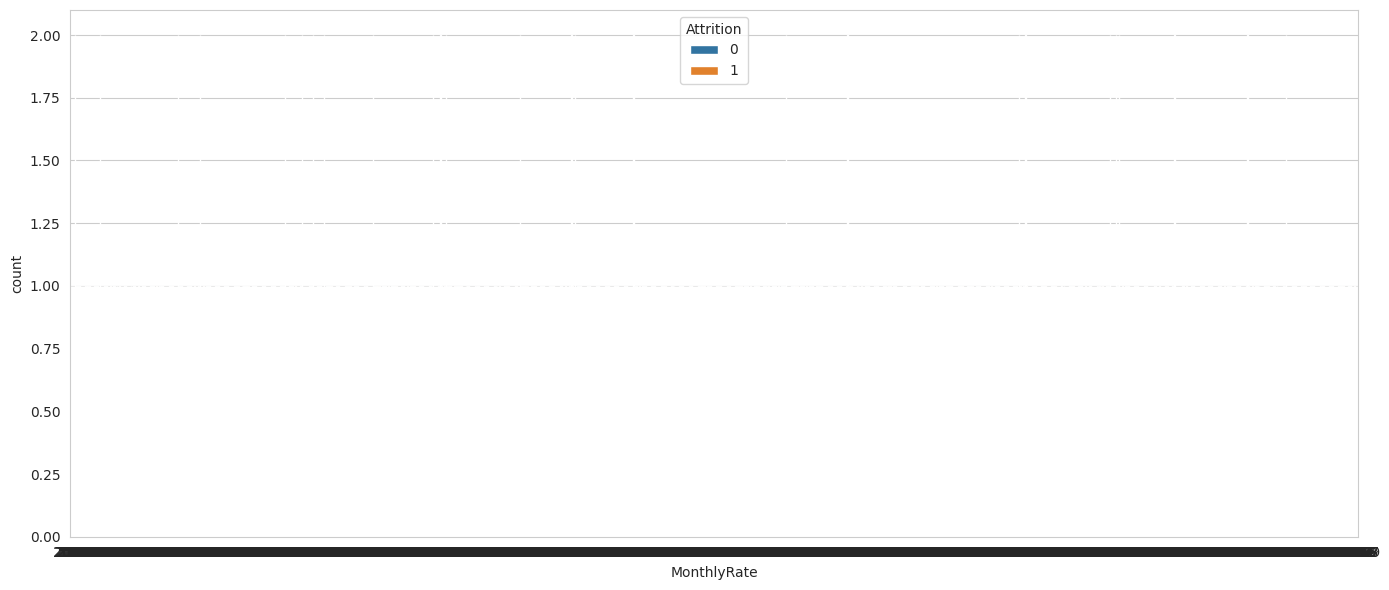

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


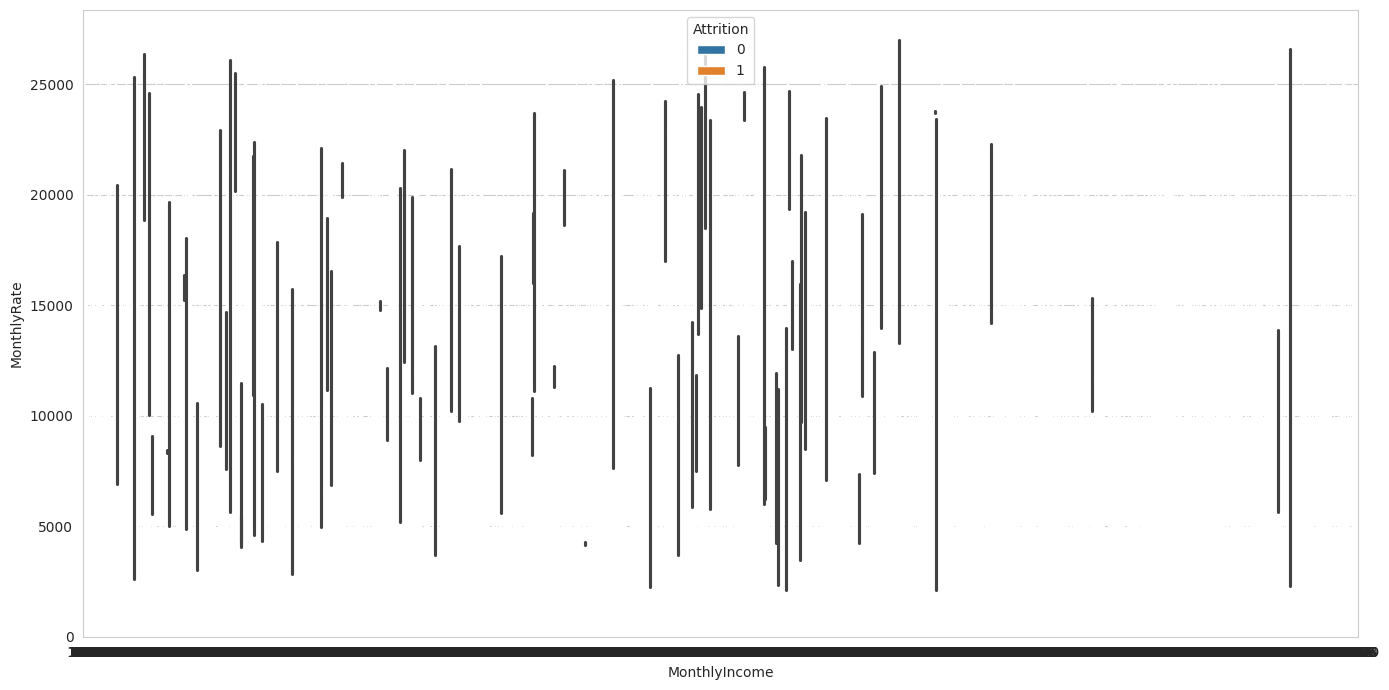

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x=df['MonthlyIncome'],hue=df['Attrition'])
plt.tight_layout()

plt.figure(figsize=(14,6))
sns.countplot(x=df['MonthlyRate'],hue=df['Attrition'])
plt.tight_layout()
plt.figure(figsize=(14,7))
g = sns.barplot(x=df['MonthlyIncome'],y=df['MonthlyRate'],hue=df['Attrition'])
plt.tight_layout()

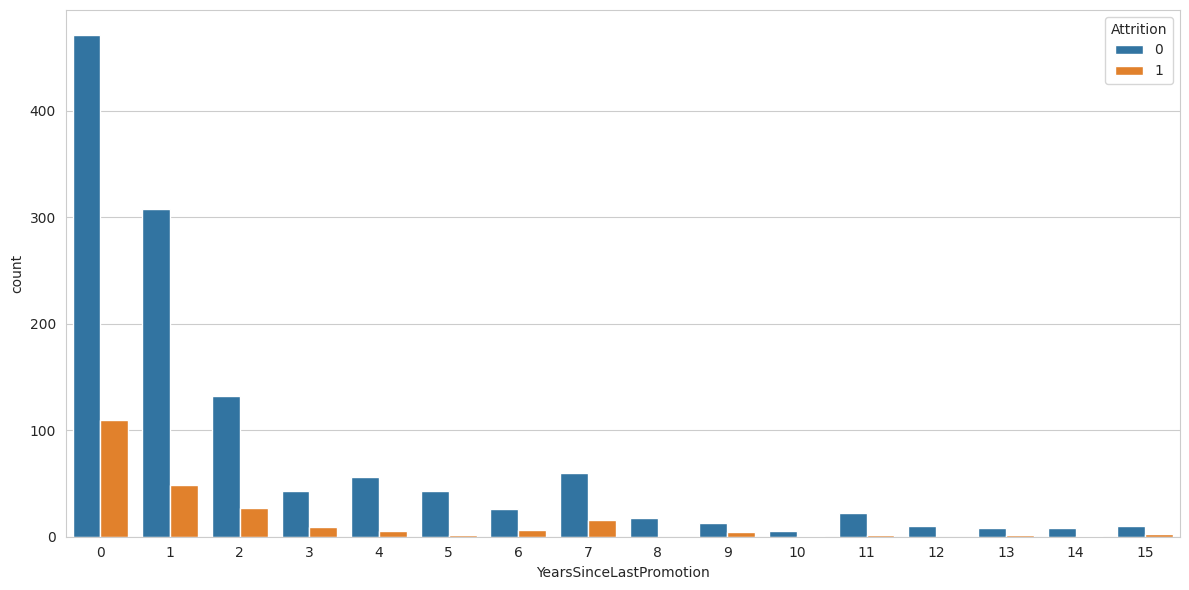

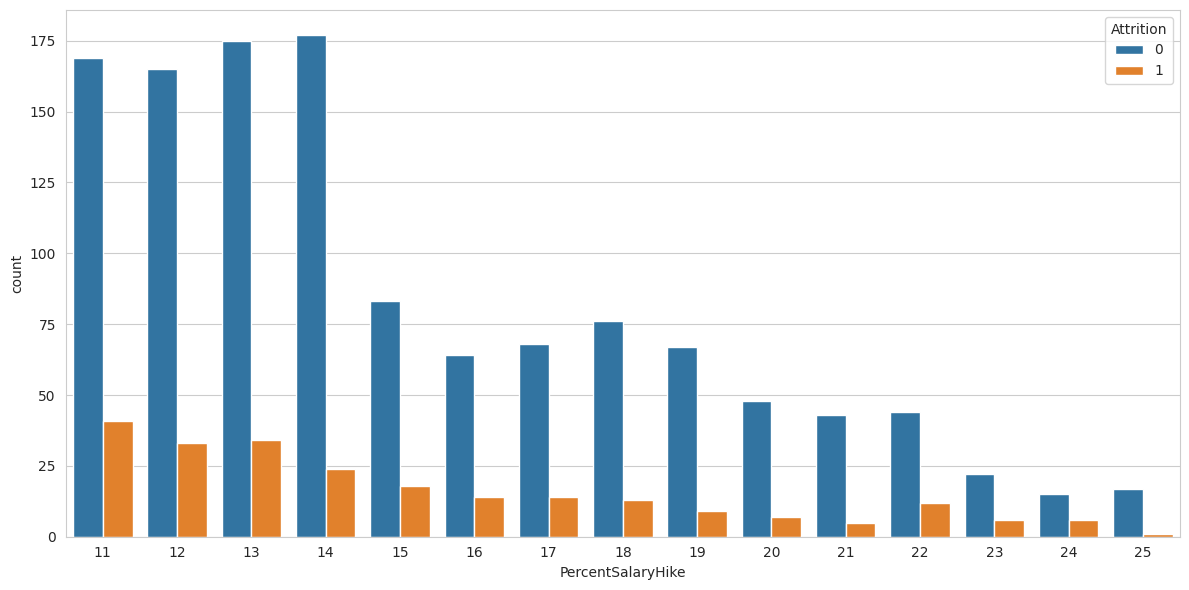

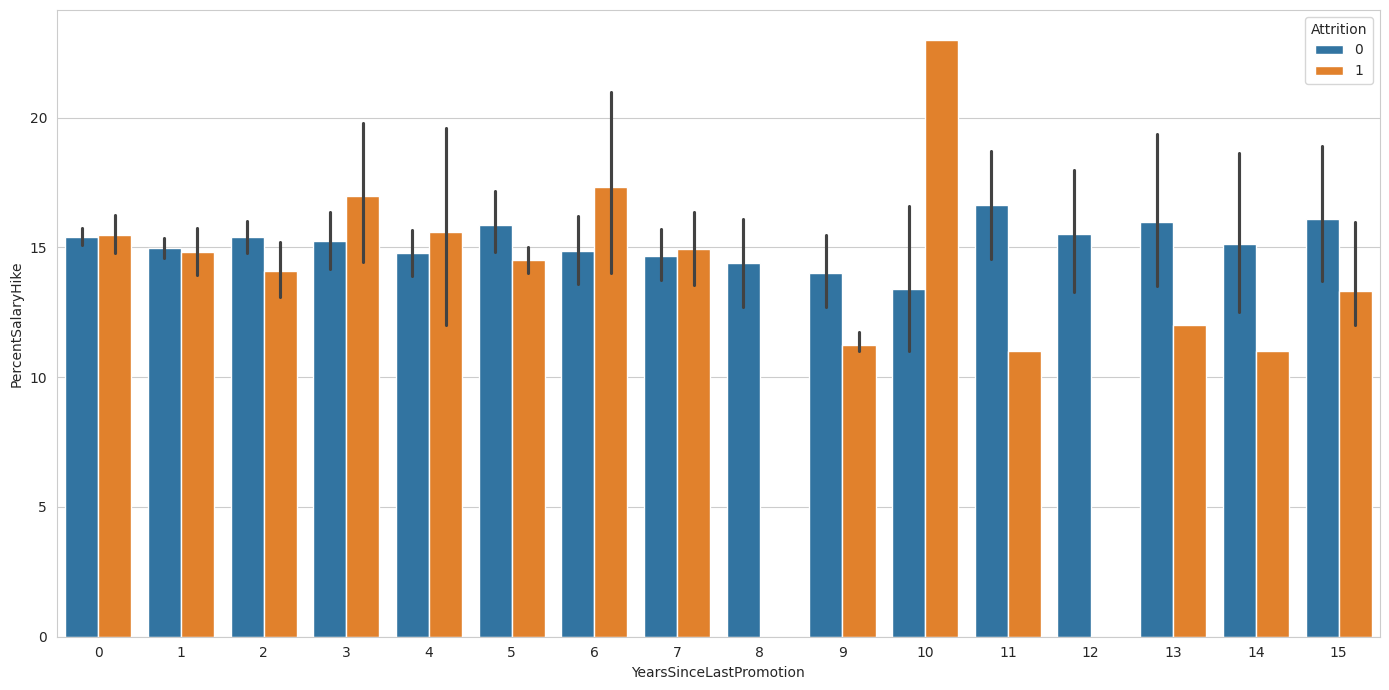

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['YearsSinceLastPromotion'],hue=df['Attrition'])
plt.tight_layout()
plt.figure(figsize=(12,6))
sns.countplot(x=df['PercentSalaryHike'],hue=df['Attrition'])
plt.tight_layout()
plt.figure(figsize=(14,7))
g = sns.barplot(x=df['YearsSinceLastPromotion'],y=df['PercentSalaryHike'],hue=df['Attrition'])
plt.tight_layout()

In [ ]:
df[df['YearsSinceLastPromotion']==1].count()

Age                         357
Attrition                   357
BusinessTravel              357
DailyRate                   357
Department                  357
DistanceFromHome            357
Education                   357
EducationField              357
EmployeeCount               357
EmployeeNumber              357
EnvironmentSatisfaction     357
Gender                      357
HourlyRate                  357
JobInvolvement              357
JobLevel                    357
JobRole                     357
JobSatisfaction             357
MaritalStatus               357
MonthlyIncome               357
MonthlyRate                 357
NumCompaniesWorked          357
Over18                      357
OverTime                    357
PercentSalaryHike           357
PerformanceRating           357
RelationshipSatisfaction    357
StandardHours               357
StockOptionLevel            357
TotalWorkingYears           357
TrainingTimesLastYear       357
WorkLifeBalance             357
YearsAtC

In [ ]:
df[(df['YearsSinceLastPromotion']==1) & (df['Attrition']==1)].count()

Age                         49
Attrition                   49
BusinessTravel              49
DailyRate                   49
Department                  49
DistanceFromHome            49
Education                   49
EducationField              49
EmployeeCount               49
EmployeeNumber              49
EnvironmentSatisfaction     49
Gender                      49
HourlyRate                  49
JobInvolvement              49
JobLevel                    49
JobRole                     49
JobSatisfaction             49
MaritalStatus               49
MonthlyIncome               49
MonthlyRate                 49
NumCompaniesWorked          49
Over18                      49
OverTime                    49
PercentSalaryHike           49
PerformanceRating           49
RelationshipSatisfaction    49
StandardHours               49
StockOptionLevel            49
TotalWorkingYears           49
TrainingTimesLastYear       49
WorkLifeBalance             49
YearsAtCompany              49
YearsInC

In [ ]:
#Proportion of those with promotion that left
print((49.0/357)*100)

13.725490196078432


In [ ]:
df[df['YearsSinceLastPromotion']==0].count()

Age                         581
Attrition                   581
BusinessTravel              581
DailyRate                   581
Department                  581
DistanceFromHome            581
Education                   581
EducationField              581
EmployeeCount               581
EmployeeNumber              581
EnvironmentSatisfaction     581
Gender                      581
HourlyRate                  581
JobInvolvement              581
JobLevel                    581
JobRole                     581
JobSatisfaction             581
MaritalStatus               581
MonthlyIncome               581
MonthlyRate                 581
NumCompaniesWorked          581
Over18                      581
OverTime                    581
PercentSalaryHike           581
PerformanceRating           581
RelationshipSatisfaction    581
StandardHours               581
StockOptionLevel            581
TotalWorkingYears           581
TrainingTimesLastYear       581
WorkLifeBalance             581
YearsAtC

In [ ]:
df[(df['YearsSinceLastPromotion']==0) & (df['Attrition']==1)].count()

Age                         110
Attrition                   110
BusinessTravel              110
DailyRate                   110
Department                  110
DistanceFromHome            110
Education                   110
EducationField              110
EmployeeCount               110
EmployeeNumber              110
EnvironmentSatisfaction     110
Gender                      110
HourlyRate                  110
JobInvolvement              110
JobLevel                    110
JobRole                     110
JobSatisfaction             110
MaritalStatus               110
MonthlyIncome               110
MonthlyRate                 110
NumCompaniesWorked          110
Over18                      110
OverTime                    110
PercentSalaryHike           110
PerformanceRating           110
RelationshipSatisfaction    110
StandardHours               110
StockOptionLevel            110
TotalWorkingYears           110
TrainingTimesLastYear       110
WorkLifeBalance             110
YearsAtC

In [ ]:
#Proportion of those without promotion that left
print((110.0/581)*100)
#Despite the small sample size, whether or not they got a promotion seems to be factor in leaving. If tested, it would probably be significant.

18.9328743545611


In [ ]:
df['MonthlyIncome'].value_counts()


MonthlyIncome
2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: count, Length: 1349, dtype: int64

In [ ]:
df['MonthlyIncome'].value_counts()
def sal_class(x):
    if x <= 5000:
        return 1
    elif 5000<x<15000:
        return 2
    elif x >= 15000:
        return 3

In [ ]:
df['sal_class'] = df['MonthlyRate'].apply(sal_class)

In [ ]:
df['sal_class'].value_counts()


sal_class
3    697
2    602
1    171
Name: count, dtype: int64

In [ ]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [ ]:
def job_class(x):
    if x == "Sales Executive":
        return 1
    elif x == "Research Scientist":
        return 2
    elif x == "Laboratory Technician":
        return 3
    elif x == "Manufacturing Director":
        return 4
    elif x == "Healthcare Representative":
      return 5
    elif x == "Manager":
        return 6
    elif x == "Sales Representative":
        return 7
    elif x == "Research Director":
        return 8
    elif x == "Human resources":
        return 9


In [ ]:
df['job_class'] = df['JobRole'].apply(job_class)

In [ ]:
df['job_class'].value_counts()

job_class
1.0    326
2.0    292
3.0    259
4.0    145
5.0    131
6.0    102
7.0     83
8.0     80
Name: count, dtype: int64

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split # Correct module name for train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X = df[['Age','DistanceFromHome','EnvironmentSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears',
        'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','sal_class','YearsWithCurrManager']]
y = df['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))


[[366   5]
 [ 69   1]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       371
           1       0.17      0.01      0.03        70

    accuracy                           0.83       441
   macro avg       0.50      0.50      0.47       441
weighted avg       0.73      0.83      0.77       441



In [ ]:
#X = df[['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion']]
##y = df['Attrition']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)
#predictions = logmodel.predict(X_test)
#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))


[[367   4]
 [ 70   0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.83       441
   macro avg       0.42      0.49      0.45       441
weighted avg       0.71      0.83      0.76       441



In [12]:
df.drop([ 'EmployeeCount','StandardHours','Over18'], axis = 1,inplace=True)

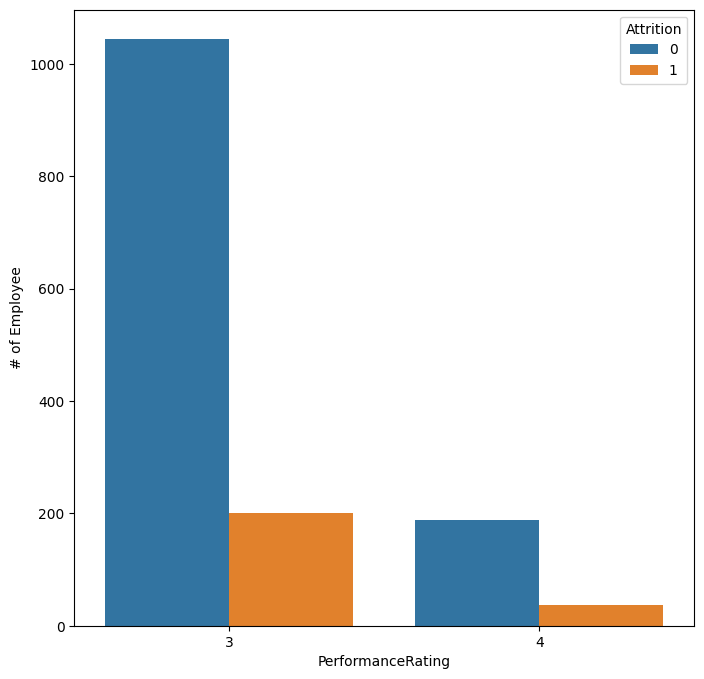

In [22]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x='PerformanceRating', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r



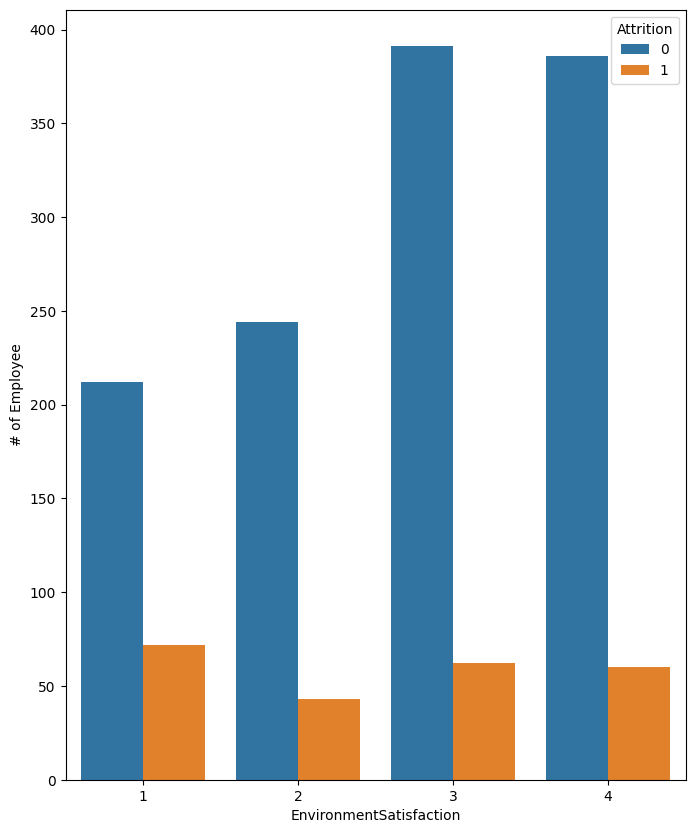

In [15]:
plt.figure(figsize=(8,10))
ax = sns.countplot(x='EnvironmentSatisfaction', data=df, hue="Attrition")
ax.set_ylabel('# of Employee')
bars = ax.patches

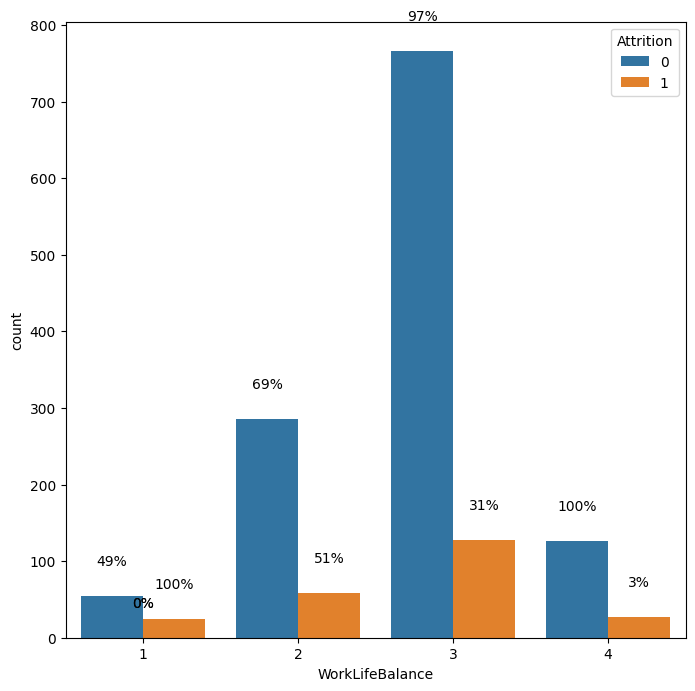

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
ax = sns.countplot(x='WorkLifeBalance',data=df,hue="Attrition")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

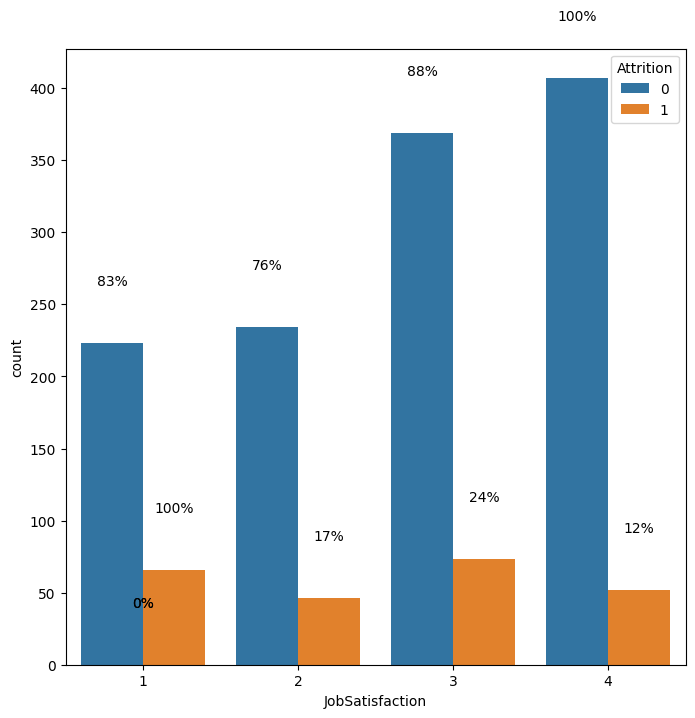

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
ax = sns.countplot(x='JobSatisfaction',data=df,hue="Attrition")
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
X = df.drop(['Attrition'], axis=1)

X.head()
X.shape
y = df['Attrition']

y.head()
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

NameError: name 'load_diabetes' is not defined